In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem import PorterStemmer
import matplotlib.ticker as mtick
from urllib.parse import urlparse

In [183]:
df_original = pd.read_csv('Entrenamieto_ECI_2020.csv')
df = df_original

In [184]:
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [185]:
df.dtypes

ID                                      int64
Region                                 object
Territory                              object
Pricing, Delivery_Terms_Quote_Appr      int64
Pricing, Delivery_Terms_Approved        int64
Bureaucratic_Code_0_Approval            int64
Bureaucratic_Code_0_Approved            int64
Submitted_for_Approval                  int64
Bureaucratic_Code                      object
Account_Created_Date                   object
Source                                 object
Billing_Country                        object
Account_Name                           object
Opportunity_Name                       object
Opportunity_ID                          int64
Sales_Contract_No                      object
Account_Owner                          object
Opportunity_Owner                      object
Account_Type                           object
Opportunity_Type                       object
Quote_Type                             object
Delivery_Terms                    

In [186]:
df["Region"].value_counts()

Japan          4892
EMEA           4664
Americas       3945
APAC           3262
Middle East     184
Name: Region, dtype: int64

In [187]:
df["Territory"].value_counts()

None               4999
Germany            1682
NW America         1568
Australia          1208
India               809
                   ... 
Egypt                 1
Georgia               1
Czech Republic        1
Solomon Islands       1
Monaco                1
Name: Territory, Length: 76, dtype: int64

In [188]:
df_1 = df
df_1["unos"] = 1
pivot = df_1.pivot_table(index = "Region", columns = "Territory", values = "unos", aggfunc = lambda x : x.count())
pivot

Territory,Albania,Armenia,Australia,Austria,Belarus,Belgium,Bosnia & Herzegovina,Bulgaria,Burma,Cambodia,...,Switzerland,Taiwan,Thailand,Tunisia,Turkey,UAE (Dubai),UAE (Others),Ukraine,United Kingdom,Vietnam
Region,,,,,,,,,,,,,,,,,,,,,
APAC,NaN,NaN,1208.0,NaN,NaN,NaN,NaN,NaN,1.0,4.0,...,NaN,33.0,173.0,NaN,NaN,NaN,NaN,NaN,NaN,51.0
Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EMEA,2.0,2.0,NaN,145.0,4.0,285.0,4.0,5.0,NaN,NaN,...,21.0,NaN,NaN,5.0,29.0,12.0,NaN,5.0,313.0,NaN
Japan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Middle East,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19.0,2.0,NaN,NaN,NaN


In [189]:
pivot = pivot.loc[:, pivot.count() != 1]
pivot

Territory,Jordan,KSA,Kuwait,None,SE America,SW America,UAE (Dubai)
Region,,,,,,,
APAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Americas,NaN,NaN,NaN,571.0,483.0,204.0,NaN
EMEA,1.0,2.0,1.0,187.0,10.0,2.0,12.0
Japan,NaN,NaN,NaN,4211.0,NaN,NaN,NaN
Middle East,101.0,11.0,3.0,30.0,NaN,NaN,19.0


In [190]:
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,unos
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None,1
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None,1
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None,1
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None,1
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None,1


# Relacion entre los stages con las regiones

In [191]:
#falta titulo, etc del grafico
df = df_original
grouped_by_region = df.groupby(['Region','Opportunity_Name','Stage']).agg({'ID':['count']})
grouped_by_region.columns = ['cantidad']
grouped_by_region = grouped_by_region.reset_index()
grouped_by_region

,Region,Opportunity_Name,Stage,cantidad
0,APAC,Opportunity_Name_10000,Closed Lost,1
1,APAC,Opportunity_Name_10001,Closed Won,1
2,APAC,Opportunity_Name_10002,Closed Lost,1
3,APAC,Opportunity_Name_10003,Closed Lost,1
4,APAC,Opportunity_Name_10005,Closed Lost,1
...,...,...,...,...
9836,Middle East,Opportunity_Name_9049,Closed Lost,1
9837,Middle East,Opportunity_Name_9050,Proposal,1
9838,Middle East,Opportunity_Name_9057,Closed Lost,1
9839,Middle East,Opportunity_Name_9473,Closed Lost,1


In [192]:
grouped = grouped_by_region.groupby(['Region','Stage']).agg({'cantidad':'count'})
grouped = grouped.reset_index()
grouped

,Region,Stage,cantidad
0,APAC,Closed Lost,924
1,APAC,Closed Won,1155
2,APAC,Proposal,5
3,APAC,Qualification,2
4,Americas,Closed Lost,1358
5,Americas,Closed Won,1094
6,Americas,Negotiation,4
7,Americas,Proposal,3
8,EMEA,Closed Lost,1737
9,EMEA,Closed Won,1500


In [193]:
pivoted = grouped.pivot(index = 'Region', columns = 'Stage', values = 'cantidad').fillna(0)
pivoted = pivoted.reset_index()
pivoted

Stage,Region,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
0,APAC,924.0,1155.0,0.0,5.0,2.0
1,Americas,1358.0,1094.0,4.0,3.0,0.0
2,EMEA,1737.0,1500.0,1.0,3.0,0.0
3,Japan,595.0,1290.0,1.0,13.0,7.0
4,Middle East,105.0,33.0,5.0,6.0,0.0


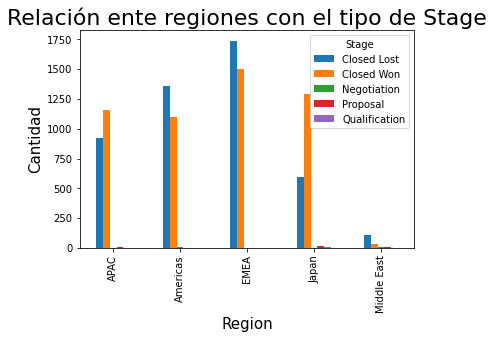

In [194]:
ax=pivoted.plot(kind='bar', y=['Closed Lost','Closed Won','Negotiation','Proposal','Qualification'], x='Region')
ax.set_title("Relación ente regiones con el tipo de Stage", fontsize=22)
ax.set_xlabel("Region",fontsize=15)
ax.set_ylabel("Cantidad", fontsize=15) 
plt.show()

# Relacion entre marcas y stages

In [195]:
df = df_original
df = df[df['Brand'] != 'None']
df = df[df['Brand'] != 'Other']
grouped = df.groupby(['Brand','Opportunity_Name','Stage']).agg({'ID':['count']})
grouped.columns = ['cantidad']
grouped = grouped.reset_index()
grouped

,Brand,Opportunity_Name,Stage,cantidad
0,Brand_0,Opportunity_Name_12739,Closed Lost,1
1,Brand_0,Opportunity_Name_12752,Closed Lost,1
2,Brand_0,Opportunity_Name_12868,Closed Lost,1
3,Brand_0,Opportunity_Name_4762,Closed Lost,1
4,Brand_1,Opportunity_Name_4415,Closed Lost,1
...,...,...,...,...
286,Brand_9,Opportunity_Name_9389,Closed Lost,1
287,Brand_9,Opportunity_Name_9390,Closed Lost,1
288,Brand_9,Opportunity_Name_9391,Closed Lost,1
289,Brand_9,Opportunity_Name_9698,Closed Lost,2


In [196]:
grouped = grouped.groupby(['Brand','Stage']).agg({'cantidad':'count'})
grouped = grouped.reset_index()
grouped

,Brand,Stage,cantidad
0,Brand_0,Closed Lost,4
1,Brand_1,Closed Lost,1
2,Brand_10,Closed Lost,21
3,Brand_11,Closed Lost,31
4,Brand_12,Closed Lost,2
5,Brand_13,Closed Lost,12
6,Brand_16,Closed Lost,2
7,Brand_17,Closed Lost,4
8,Brand_19,Closed Lost,1
9,Brand_2,Closed Lost,3


In [197]:
#conclusion los registros que contienen marcas son TODOS Closed Lost
pivoted = grouped.pivot(index = 'Brand', columns = 'Stage', values = 'cantidad')
pivoted = pivoted.reset_index()
pivoted.set_index('Brand')

Stage,Closed Lost
Brand,
Brand_0,4
Brand_1,1
Brand_10,21
Brand_11,31
Brand_12,2
Brand_13,12
Brand_16,2
Brand_17,4
Brand_19,1


# Relacion tamaño del producto con stages

In [198]:
df = df_original
grouped = df.groupby(['Size','Opportunity_Name','Stage']).agg({'ID':['count']})
grouped.columns = ['cantidad']
grouped = grouped.reset_index()
grouped

,Size,Opportunity_Name,Stage,cantidad
0,None,Opportunity_Name_0,Closed Lost,7
1,None,Opportunity_Name_1,Closed Lost,7
2,None,Opportunity_Name_100,Closed Won,1
3,None,Opportunity_Name_1000,Closed Lost,1
4,None,Opportunity_Name_10000,Closed Lost,1
...,...,...,...,...
9836,Size_4,Opportunity_Name_9712,Closed Lost,1
9837,Size_4,Opportunity_Name_9761,Closed Lost,3
9838,Size_4,Opportunity_Name_9762,Closed Lost,9
9839,Size_4,Opportunity_Name_9909,Closed Lost,1


In [199]:
grouped = grouped.groupby(['Size','Stage']).agg({'cantidad':'count'})
grouped = grouped.reset_index()
grouped

,Size,Stage,cantidad
0,None,Closed Lost,4081
1,None,Closed Won,5072
2,None,Negotiation,11
3,None,Proposal,30
4,None,Qualification,9
5,Other,Closed Lost,254
6,Size_0,Closed Lost,5
7,Size_1,Closed Lost,11
8,Size_2,Closed Lost,1
9,Size_3,Closed Lost,245


In [200]:
pivoted = grouped.pivot(index = 'Size', columns = 'Stage', values = 'cantidad').fillna(0)
pivoted = pivoted.reset_index()
pivoted

Stage,Size,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
0,None,4081.0,5072.0,11.0,30.0,9.0
1,Other,254.0,0.0,0.0,0.0,0.0
2,Size_0,5.0,0.0,0.0,0.0,0.0
3,Size_1,11.0,0.0,0.0,0.0,0.0
4,Size_2,1.0,0.0,0.0,0.0,0.0
5,Size_3,245.0,0.0,0.0,0.0,0.0
6,Size_4,122.0,0.0,0.0,0.0,0.0


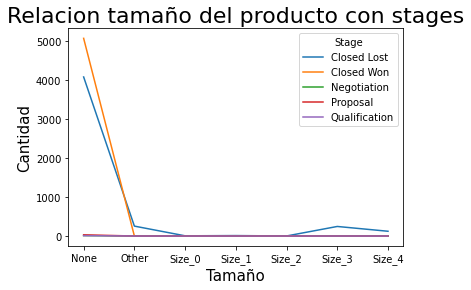

In [201]:
ax=pivoted.plot(y=['Closed Lost','Closed Won','Negotiation','Proposal','Qualification'], x='Size')
ax.set_title("Relación tamaño del producto con stages", fontsize=22)
ax.set_xlabel("Tamaño",fontsize=15)
ax.set_ylabel("Cantidad", fontsize=15) 
plt.show()

# Relacion tipo de moneda con stages

In [202]:
df = df_original
grouped = df.groupby(['ASP_Currency','Opportunity_Name','Stage']).agg({'ID':['count']})
grouped.columns = ['cantidad']
grouped = grouped.reset_index()
grouped

,ASP_Currency,Opportunity_Name,Stage,cantidad
0,AUD,Opportunity_Name_10113,Closed Won,2
1,AUD,Opportunity_Name_10114,Closed Won,4
2,AUD,Opportunity_Name_10115,Closed Won,1
3,AUD,Opportunity_Name_10116,Closed Won,1
4,AUD,Opportunity_Name_10117,Closed Won,1
...,...,...,...,...
9836,USD,Opportunity_Name_9991,Closed Won,1
9837,USD,Opportunity_Name_9992,Closed Lost,1
9838,USD,Opportunity_Name_9995,Closed Lost,2
9839,USD,Opportunity_Name_9997,Closed Lost,1


In [203]:
grouped = grouped.groupby(['ASP_Currency','Stage']).agg({'cantidad':'count'})
grouped = grouped.reset_index()
grouped

,ASP_Currency,Stage,cantidad
0,AUD,Closed Lost,49
1,AUD,Closed Won,269
2,EUR,Closed Lost,1650
3,EUR,Closed Won,1471
4,EUR,Negotiation,1
5,EUR,Proposal,1
6,GBP,Closed Lost,2
7,JPY,Closed Lost,462
8,JPY,Closed Won,1122
9,JPY,Negotiation,1


In [204]:
pivoted = grouped.pivot(index = 'ASP_Currency', columns = 'Stage', values = 'cantidad').fillna(0)
pivoted = pivoted.reset_index()
pivoted

Stage,ASP_Currency,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
0,AUD,49.0,269.0,0.0,0.0,0.0
1,EUR,1650.0,1471.0,1.0,1.0,0.0
2,GBP,2.0,0.0,0.0,0.0,0.0
3,JPY,462.0,1122.0,1.0,12.0,7.0
4,USD,2556.0,2210.0,9.0,17.0,2.0


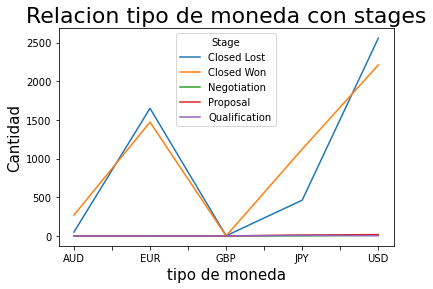

In [205]:
ax=pivoted.plot(y=['Closed Lost','Closed Won','Negotiation','Proposal','Qualification'], x='ASP_Currency')
ax.set_title("Relación tipo de moneda con stages", fontsize=22)
ax.set_xlabel("tipo de moneda",fontsize=15)
ax.set_ylabel("Cantidad", fontsize=15) 
plt.show()

# relacion Delivery_Quarter con stages

In [219]:
df = df_original
grouped = df.groupby(['Delivery_Quarter','Opportunity_Name','Stage']).agg({'ID':['count']})
grouped.columns = ['cantidad']
grouped = grouped.reset_index()
grouped

,Delivery_Quarter,Opportunity_Name,Stage,cantidad
0,Q1,Opportunity_Name_1000,Closed Lost,1
1,Q1,Opportunity_Name_10010,Closed Lost,1
2,Q1,Opportunity_Name_10020,Closed Lost,1
3,Q1,Opportunity_Name_10023,Closed Won,1
4,Q1,Opportunity_Name_10024,Closed Lost,1
...,...,...,...,...
10255,Q4,Opportunity_Name_9979,Closed Won,1
10256,Q4,Opportunity_Name_9980,Closed Won,2
10257,Q4,Opportunity_Name_9982,Closed Won,1
10258,Q4,Opportunity_Name_9991,Closed Won,1


In [220]:
grouped = grouped.groupby(['Delivery_Quarter','Stage']).agg({'cantidad':'count'})
grouped = grouped.reset_index()
grouped

,Delivery_Quarter,Stage,cantidad
0,Q1,Closed Lost,1235
1,Q1,Closed Won,1197
2,Q1,Negotiation,5
3,Q1,Proposal,12
4,Q1,Qualification,1
5,Q2,Closed Lost,1230
6,Q2,Closed Won,1314
7,Q2,Negotiation,5
8,Q2,Proposal,8
9,Q2,Qualification,3


In [221]:
pivoted = grouped.pivot(index = 'Delivery_Quarter', columns = 'Stage', values = 'cantidad').fillna(0)
pivoted = pivoted.reset_index()
pivoted

Stage,Delivery_Quarter,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
0,Q1,1235.0,1197.0,5.0,12.0,1.0
1,Q2,1230.0,1314.0,5.0,8.0,3.0
2,Q3,1294.0,1284.0,1.0,9.0,1.0
3,Q4,1163.0,1490.0,0.0,4.0,4.0


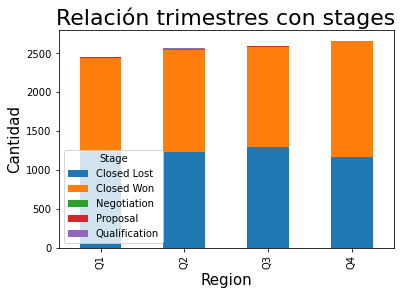

In [232]:
ax=pivoted.plot(stacked=True,kind='bar', y=['Closed Lost','Closed Won','Negotiation','Proposal','Qualification'], x='Delivery_Quarter')
ax.set_title("Relación trimestres con stages", fontsize=22)
ax.set_xlabel("Region",fontsize=15)
ax.set_ylabel("Cantidad", fontsize=15) 
plt.show()

# relacion Delivery_Year con stages

In [210]:
df = df_original
grouped = df.groupby(['Delivery_Year','Opportunity_Name','Stage']).agg({'ID':['count']})
grouped.columns = ['cantidad']
grouped = grouped.reset_index()
grouped

,Delivery_Year,Opportunity_Name,Stage,cantidad
0,2016,Opportunity_Name_0,Closed Lost,7
1,2016,Opportunity_Name_1,Closed Lost,7
2,2016,Opportunity_Name_1000,Closed Lost,1
3,2016,Opportunity_Name_10001,Closed Won,1
4,2016,Opportunity_Name_10005,Closed Lost,1
...,...,...,...,...
9901,2020,Opportunity_Name_5647,Proposal,1
9902,2020,Opportunity_Name_5798,Proposal,1
9903,2020,Opportunity_Name_6537,Proposal,1
9904,2020,Opportunity_Name_8973,Proposal,1


In [211]:
grouped = grouped.groupby(['Delivery_Year','Stage']).agg({'cantidad':'count'})
grouped = grouped.reset_index()
grouped

,Delivery_Year,Stage,cantidad
0,2016,Closed Lost,1161
1,2016,Closed Won,1144
2,2017,Closed Lost,1743
3,2017,Closed Won,2163
4,2017,Proposal,1
5,2018,Closed Lost,1677
6,2018,Closed Won,1730
7,2019,Closed Lost,171
8,2019,Closed Won,66
9,2019,Negotiation,11


In [212]:
pivoted = grouped.pivot(index = 'Delivery_Year', columns = 'Stage', values = 'cantidad').fillna(0)
pivoted = pivoted.reset_index()
pivoted

Stage,Delivery_Year,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
0,2016,1161.0,1144.0,0.0,0.0,0.0
1,2017,1743.0,2163.0,0.0,1.0,0.0
2,2018,1677.0,1730.0,0.0,0.0,0.0
3,2019,171.0,66.0,11.0,20.0,6.0
4,2020,0.0,0.0,0.0,10.0,3.0


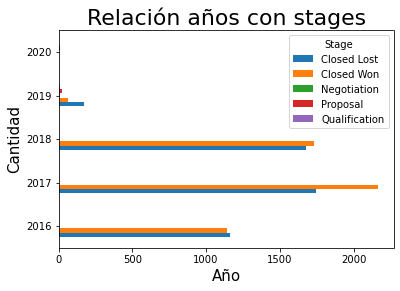

In [213]:
ax=pivoted.plot(kind='barh', y=['Closed Lost','Closed Won','Negotiation','Proposal','Qualification'], x='Delivery_Year')
ax.set_title("Relación años con stages", fontsize=22)
ax.set_xlabel("Año",fontsize=15)
ax.set_ylabel("Cantidad", fontsize=15) 
plt.show()

# promedio price de stages

In [214]:
#de aca se deduce que si tiene precio es Closed Lost
df = df_original
df = df[df['Price'] != 'None']
df = df[df['Price'] != 'Other']
df['Price'] = df['Price'].astype(float)
grouped = df.groupby('Stage').agg({'Price':['count','mean']})
grouped.columns = ['cantidad','promedio']
grouped = grouped.reset_index()
grouped

,Stage,cantidad,promedio
0,Closed Lost,356,0.320323
